## 066. Introduction

- In this section, you're going to learn how `easy` it is to collect the data from the end-user and process it using Django forms
- They're similar to HTML forms, but you'll first write Python code and then on-the-fly `HTML forms will be generated` for you
- So, you as a Python developer need not work with HTML forms anymore
- We'll do a minimal work in your template or in the HTML, you'll be creating a form using Python code
- And also, there will be several `validations` that will come to you for free, when you create your forms using Python or Django
- Several form-field validations are available for you which are in-built into Django or you can create custom validations easily using Python code
- Next, the form data can be easily converted into your objects, your model and also your data-structures such as List, Set, etc.
- Last and very important, in the next section, you'll be learning Model-based forms, that is the forms directly represent your Model and that data can be directly save into database, updated, deleted, etc.
- So, due to these advantages, we should be using Django forms instead of HTML forms
- Indirectly, Django forms are nothing but HTML forms, that HTML will be generated for you on-the-fly



## 067. Hands on Steps

- In the next few lecture, you'll create your Django form called "User Registration" form, which will be rendered to the end-user where you can fill in the details, and when he clicks on the "Submit", those details can be received by the View that you've created in your application, then process the data
- You're going to do that in the following simple steps
  1. We'll `Create a Form`: to start with a new module called `forms.py`. We'll create a form which will be very similar to the model class that we've created earlier
  2. `Use that form in the View` to render it to the user
  3. `Create the HTML that uses the form`: So you send that form to the template from the view. The template will use it
  4. `Configure CSRF token`: We'll include a CSRF token for security reasons inside the form inside the HTML
  5. `Forms in action`: You can the configure the URLs and see forms in action
  6. `Collecting form data in the view`: Once the form is submitted, we'll learn how to collect the data in the view
- So initially, the view will be rendering an empty form, and once the user submits the data, then we'll need to process the data in the view again that'll be `HTTP POST`



## 068. Create the Project

- In this lecture, you'll start working with forms
- To do that, we'll need a project, and thats what is the very first step
- Goto command-line/terminal, goto the projects directory `djangoprojects`, and use command below to create a project

```bash
django-admin startproject formsDemo
```

- Now go into the Project `formsDemo using command below

```bash
cd formsDemo
```

- Lets create an application as well using command below

```bash
python manage.py startapp formsApp
```

- Now, we have the project and an app in it, open the `formsDemo` project in your IDE
- First register the app `formsApp` in the `settings.py` file, search for `INSTALLED_APPS` property and append the app name `formsApp` into it as indicated below

```python
INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'formsApp',
]
```

- Configure the templates here, so that we can use the template later on, the form will go into an HTML template
  - Create a folder named `templates` in the project directory `formsDemo`
- Now open the `settings.py` file in the project directory `formsDemo`, and search for `TEMPLATES` property in it, and add the `templates` directory which you created recently in the `DIRS` list of `TEMPLATES` property as indicated below

```python
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [BASE_DIR / 'templates'],
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]
```

- So, now we have templates configured



## 069. Create the Form

- In this lecture, you'll create your very first Django form
- We're going to work on a `User Registration` application, where the user has to provide the `firstName`, `lastName` and `email` for now, we'll capture his `password` information later on as an enhancement
- Goto your IDE, create a new file `forms.py` under the application directory `formsApp`, and within this `forms.py` we're going to create our Django form
- Now open the `forms.py` file in `formsApp` directory =, and import `forms` from `django

```python
from django import forms
```

- Now create a class called `UserRegistrationFrom` which it should extend `forms.Form`, and within this class we add all the field which we'll need, so add the fields `firstName`, `lastName` and `email` with type `forms.CharField()`

```python
class UserRegistrationForm(forms.Form):
    firstName = forms.CharField()
    lastName = forms.CharField()
    email = forms.CharField()
```



## 070. CSRF Token

- In this lecture, you'll learn what CSRF stands for and how Django has in-built support to prevent it from happening
- CSRF stands for Cross Site Request Forgery
- We'll develop a Django application that runs on a server, the client accesses our application, we send it an HTML form to submit, the user fills in the information, clicks on the Submit button, we use the POST method to get the data, we process the data and send a response back
- All this is awesome, but what if a hacker comes into the picture, he grabs the form when you're sending an HTML form to the client on the internet, and then he'll use that form to send whatever data he wants into the server so into our database, which is nothing but Cross Site Request Forgery
- Django has in-built support to prevent this from happening
- When an HTML form is pushed to the client, Django will automatically include a `csrf_token` into the form, which is a long UUID kind of field, which will be alpha-numeric, and it'll be added to the form as a hidden field
- All we need to do is to simply use the tags `{% csrf_token %}`, which is the name with which the long ID is available, so that'll become a part of the form and the token will be valid only for a little bit of time
- So after sometime, the token is gone, the hacker grabs hold of the form, and if he tries to submit the form at some point of time later, Django server will reject the request saying that the CSRF token in your form is invalid
- When you created you very first project, you already have CSRF support for it, you can goto `settings.py` of any of the projects, search for `MIDDLEWARE`, there you'll see `django.middleware.csrf.CsrfViewMiddleware` which makes sure that our views are protected by adding a unique & hidden field to every form that is pushed to the client, and that field's value will expire after sometime so that hackers cannot use Cross Site Request Forgery
- 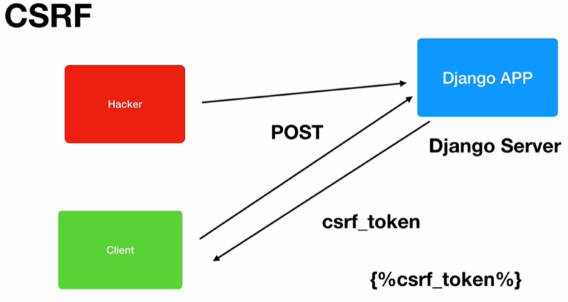



## 071. Use the form in the View

- The next step is to use the form inside our View
- The view is responsible for sending the form to the template as well as processing the data once the data is submitted
- So, in this lecture, we'll do the first step of sending the form to the template from the view
- Goto the IDE, open `views.py` file in `formsApp`, create a view named `userRegistrationView`
  - Import `forms` from the project directory

  ```python
  from . import forms
  ```

  - define the view `userRegistrationView()` as below

  ```python
  def userRegistrationView(request):
      form = forms.UserRegistrationForm()
      return render(request, 'formsDemo/userRegistration.html', {'form':form})
  ```



## 072. Create the template

- In this lecture, we'll create an HTML template, that'll use the form
- Goto `template` folder, create a folder named `formsDemo`, and inside this folder create a file `formsDemo/userRegistration.html`
- We can add the elements in Django forms using Django template variable `{{ form.as_p }}`, so `as_p` will render the text as HTML Paragraph
- You can also use below Django template tags in forms
  1. `{{ form.as_p }}` : renders as HTML Paragraph
  2. `{{ form.as_table }}`: renders as HTML Table
  3. `{{ form.as_ul }}` : renders as HTML Unordered List
- Now modify this `templates/formsDemo/userRegistration.html` template file as below

```html
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
    <meta charset="UTF-8">
    <title>User Registration</title>
</head>
<body>
    <h1>User Registration</h1>
    <form method="post">
        {{ form.as_p }}
    </form>
</body>
</html>
```



## 073. Configure the CSRF Token and URLs

- In this lecture, we'll do a couple of things
  1. We'll first add the CSRF (Cross-Site Request Forgery) token, which Django provides, without that our forms won't work, If we want, we can take it out later on to test it
      - Open the template file `templates/formsDemo/userRegistration.html` in which you've added the Django form, and add a Django Template Tag `{% csrf_token %}`, so Django will automatically add an HTML hidden field there, and value of that hidden field will have the CSRF token which Django generates
        - When User submits the form, Django will get the token every time, we'll not have any security issue, thats the first step
        - Now, Modify the `templates/formsDemo/userRegistration.html` template as shown below

        ```html
        <!DOCTYPE html>
        <html lang="en" dir="ltr">
        <head>
            <meta charset="UTF-8">
            <title>User Registration</title>
        </head>
        <body>
            <h1>User Registration</h1>
            <form method="post">
                {{ form.as_p }}
                {% csrf_token %}
            </form>
        </body>
        </html>
        ```

  2. Next, we'll also configure the URLs for our application
        - Goto `urls.py` file, add a `path()` with `route='userRegistration/'`, and after importing `views` from `formsApp`, pass `view=views.userRegistrationView` to the `path()`

        ```python
        from formsApp import views
        urlpatterns = [
            path('admin/', admin.site.urls),
            path(route='userRegistration/', view=views.userRegistrationView),
        ]
        ```

- So, in this lecture you've done a couple of things, you've added a CSRF token so that Django will include a hidden field with the CSRF token that it generates which is a long alpha-numeric value that will go to the client, and can be verified on the web-browser by looking at the source of the HTML, and also you've configured a URL for your view



## 074. Forms in action

- In this lecture, you'll first see a Django form in action
- Goto terminal/command-line and start the Django server using command below

```bash
python manage.py runserver
```

- Now, launch your web-browser, and visit `localhost:8000/userRegistration`, which displays a form that does not have a submit button but has three fields `firstName`, `lastName` and `email` only
- Lets add a `Submit` button, go back to your IDE, open `templates/formsDemo/userRegistration.html` file and right after `{% csrf_token %}`, you can add a submit button as indicated below

```html
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
    <meta charset="UTF-8">
    <title>User Registration</title>
</head>
<body>
    <h1>User Registration</h1>
    <form method="post">
        {{ form.as_p }}
        {% csrf_token %}
        <input type="submit" name="" value="Submit">
    </form>
</body>
</html>
```

- After saving this HTML, you may refresh the page at `localhost:8000/userRegistration` in web-browser to see the changes
- Now we have a complete form now, but we have to process the data which will be in the next lecture
- Now, in web-browser, right-click and select `View Page Source` or do `Ctrl+U`, there you can see the CSRF token which is a hidden field and automatically included by Django

```html
<input type="hidden" name="csrfmiddlewaretoken" value="9V3VNKoUHgKDypYBFkVpZ58GvIq2wPIOWD05lbWO6mapZMHcEs4LfKXvk4poxR4V">
```

- When the form is submitted, we'll receive it in the backend, and we'll not have any issue, if you take it out, you'll get a security issue, you can verify that once we hand-in the form submission in the next lecture
- As you've seen in the source, each element in the form uses a `<p>paragraph</p>` tag, which is because you've used Django Template variable `{{ form.as_p }}`
- You may also change the HTML to render the fields as a `table` using Django Template variable `{{ form.as_table }}` as indicated below

```html
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
    <meta charset="UTF-8">
    <title>User Registration</title>
</head>
<body>
    <h1>User Registration</h1>
    <form method="post">
        <table>
        {{ form.as_table }}
        {% csrf_token %}
        </table>
    <br><input type="submit" name="" value="Submit">
    </form>
</body>
</html>
```

- If you want to inspect it, you may check to see that each of the element in the form except Submit button is rendered as a table element, because form fields are inside `<table></table>` tags and form fields are rendered using `{{ form.as_table }} Django template variable`



## 075. Processing the form data

- The next step is to collect the form data in the view, that is when the user clicks the Submit button, we should process the data
- To do that, goto `views.py` file
  - add a special condition to the `userRegistrationView()` view function so that `form` object will have all the data that user submits if `request.method` is `POST`
  - Also, add a check if form is valid using `form.is_valid()`, which will validate the fields, based on the field types you've specified in `forms.py` file

    ```python
    def userRegistrationView(request):
        form = forms.UserRegistrationForm()
        if request.method=='POST':
            form = forms.UserRegistrationForm(request.POST) # form object will have all the data that user submits
            if form.is_valid():
                print("Form is valid")
                print("First Name", form.cleaned_data['firstName'])
                print("Last Name", form.cleaned_data['lastName'])
                print("Email", form.cleaned_data['email'])
        return render(request, 'formsDemo/userRegistration.html', {'form':form})
    ```

    - Now, goto command-line/terminal, and stop the Django server using `Ctrl+C`, and then start the Django server again using command below so that changes are picked up by Django automatically

        ``` bash
        python manage.py runserver
        ```

    - Now goto Web-Browser, and refresh the URL at `localhost:8000/userRegistration`, enter `firstName` as `test`, `lastName` as `test`, `email` as `test@test.com`, and hit Submit button
    - It'll submit the form and it comes back to the same form because that is how our view works, and all the prints in the `userRegistrationView()` view should be printed on the console/terminal/Command-line where Django server is running indicating that form is valid
- So that is how, you can process form data, you can save it to the database, and all that will come in the lectures later on when you learn Model Forms, etc.
- For now, you can handle the data in a form when it is submitted, by using a condition in the same view to check `if request.method == 'POST'`, then you create a `form` object by passing the `request.POST` to the constructor of your form which puts all the data in the `form.cleaned_data['fieldName']` object in dictionary format, and those form fields can be accessed using their respective field names as keys to this dictionary
- `form.is_valid()` will validate your form, more on validation is later on, and then the response is going back to the template in the same format as dictionary in `form.cleaned_data['fieldName']`



## 076. Different types of form fields

- When we create a Django form, by default Django will create those fields as `<input type="text">`, but if you want different input types, Django gives you that option
- Go back to the `forms.py` file, when you create a particular field, you can specify `widget` attribute to it
- `django.forms` module has different inputs that we can use, by default it has `widget=forms.TextInput`, but we can specify it as `widget=forms.Textarea` to use Text Area
- Modify the `firstName` field with `widget=forms.Textarea`, save it, goto web-browser, and refresh the URL at `localhost:8000/userRegistration`

```python
class UserRegistrationForm(forms.Form):
    firstName = forms.CharField(widget=forms.Textarea)
    lastName = forms.CharField()
    email = forms.CharField()
```

- Similarly, there are different types of input like, `forms.FileInput` which can be used to upload a file, `forms.Select()`, etc.
- To use a Select input type
  - You first define a list of tuples of each of the option, where each tuple is in format `[('option value', 'option label')]`
  - Then you can pass this list of tuples of options to `widget=forms.Select()`

  ```python
  class UserRegistrationForm(forms.Form):
      GENDER = [('male', 'MALE'), ('female', 'FEMALE')]
      firstName = forms.CharField()
      lastName = forms.CharField()
      email = forms.CharField()
      gender = forms.CharField(widget=forms.Select(choices = GENDER))
  ```

  - Save it, go back to the web-browser, and refresh the URL at `localhost:8000/userRegistration` to see the newly added input of type Select
  - If you want to verify the input type Select, View page source using `Ctrl+U`, and see that first part in tuple is the value and second part is the text/label which is displayed

  ```html
        <select name="gender" id="id_gender">
    <option value="male">MALE</option>
    <option value="female">FEMALE</option>
  </select>
  ```

- To add a password field, you need to set `widget=forms.PasswordInput`

    ```python
    class UserRegistrationForm(forms.Form):
        GENDER = [('male', 'MALE'), ('female', 'FEMALE')]
        firstName = forms.CharField()
        lastName = forms.CharField()
        email = forms.CharField()
        gender = forms.CharField(widget=forms.Select(choices = GENDER))
        password = forms.CharField(widget=forms.PasswordInput)
    ```

  - save these changes in `forms.py` file, go back to web-browser, and refresh the URL at `localhost:8000/userRegistration` to see the changes
- In this lecture, we have learnt how to use the various input types that are available for a Django form, so that corresponding HTML input type is rendered, using the `widget` attribute within the form field, to which we can specify the input type



## 077. Default Django Validations

- In this lecture, you'll learn abou the default validations, the form field validations that Django provides to every form that we create
- If you go back to the Web Browser UI, click the Submit button without entering any of the form fields, you'll immediately see a validation error saying to fill out that field
- You can fill only that field and try again to click the Submit button, then you'll see the error message for the next field
- So, by default, all the fields in the form are required
- If you want to make them optional, open the `forms.py`, and then you need to pass `required=False` as parameter to the Field constructor, which is `True` by default

```python
class UserRegistrationForm(forms.Form):
    GENDER = [('male', 'MALE'), ('female', 'FEMALE')]
    firstName = forms.CharField(required=False)
    lastName = forms.CharField()
    email = forms.CharField()
    gender = forms.CharField(widget=forms.Select(choices = GENDER))
    password = forms.CharField(widget=forms.PasswordInput)

```

- Now goto Web Browser and refresh the URL at `localhost:8000/userRegistration` to see the changes in action, Now don't fill any value in `FirstName` field and try to click on Submit button, it'll show error message for the `LastName` field, but doesn't complain about the `FirstName` field anymore
- This is the default validation that you get from Django for free
- To see numeric validations, add another field `ssn` as `IntegerField()` in the `forms.py` file

```python
class UserRegistrationForm(forms.Form):
    GENDER = [('male', 'MALE'), ('female', 'FEMALE')]
    firstName = forms.CharField(required=False)
    lastName = forms.CharField()
    email = forms.CharField()
    gender = forms.CharField(widget=forms.Select(choices = GENDER))
    password = forms.CharField(widget=forms.PasswordInput)
    ssn = forms.IntegerField()
```

- Now go back to the Web Browser and refresh the URL at `localhost:8000/userRegistration`, enter values for the rest for the fields, but for `ssn` field, you can't enter any alpha-numeric values, you have to enter only numeric values, that is the beauty of Django
- Once you've entered valid values, hit submit, and your form will be submitted without any issues
- So, these are the default validations depending on the data type, Python or Django will do the validations for you
- And remember, by default all these fields are required and user has to enter them, if you want to make them optional, use `required=False` as paramter to the Field class constructor



## 078. Writing Custom Clean Methods

- In this lecture you'll learn how to add your own clean methods, our custom validation methods within your form
- To do that, you define a clean method for a field in `forms.py` file
  - For `FirstName` fields, I want to make sure that max of only 20 character can be entered
  - Start with defining method name that starts with `clean`, so for field `firstName` method name would be `clean_firstname()`, and use the `Field.cleaned_data[FieldName]` dict with Field Name as key to access the value you've received in the form to do further validation to raise an exception `forms.ValidationError('Message')`, and at the end of this method return the data you got from `Field.cleaned_data[FieldName]` dict
  - Make sure to follow the naming convention of these clean methods, otherwise Django will not recognise and call these methods
  - so add a clean method as below python snippet to validate `firstName` field for length greater than 20 to raise an Error message, and then return the `cleaned _data`
  
  ```python
  def clean_firstName(self):
        inputFirstName = self.cleaned_data["firstName"]
        if len(inputFirstName) > 20:
            raise forms.ValidationError('The Max length of firstName is 20 characters')
        return inputFirstName
  ```
  
  - If an exceptions from `forms.ValidationError('Message')` is raised, then the data will not goto the view, instead it will raise the error message at the form UI in web browser
  - Also, note that the view can only get the `cleaned_data[Field]`, if it is not cleaned, data is not properly read by the view
  - All the validations that are already present also use the `cleaned_data[Field]`
  - Now go back to the Web Browser and refresh the URL at `localhost:8000/userRegistration`, enter a lot of characters in field `FirstName` and fill out the other fields in the form, then click on Submit button, and you'll see the Error Message
  - First, it does all the default validations that Django provides, and then it does the custom validations
  - If we add valid input data, `firstName` within 20 characters, etc., it'll submit the form without any error
- Lets add one more validation for `email` field
  - Add a validation of email field, by first accessing the `cleaned_data[email]`, and then check if email oes not contain `@` symbol then raise an error message, and then return the `cleaned_data[email]` otherwise view will not get the data
  
  ```python
  def clean_email(self):
        inputEmail = self.cleaned_data["email"]
        if inputEmail.find('@') == -1:
            raise forms.ValidationError(message='The email should contain @')
        return inputEmail
  ```
  
  - Now go back to the Web Browser and refresh the URL at `localhost:8000/userRegistration`, enter `admin` in `Email` field, and fill out other fields with valid values, and then click Submit, it'll raise the error message for `Email` field
  - If we input all the valid input data, `firstName` within 20 characters, `email` with @ symbol, etc., then it'll submit the form without any error
- You can more custom validation methods but the key is the naming convention that method names should start with `clean_`, and at the end of each method return the cleaned value, so that the view can get it properly



## 079. Single Clean Method

- In this leacture, you'll learn how to use a single clean method instead of having a separate clean method for each field
- In `forms.py` file, comment out the previously created clean methods, and add a new clean method `clean(self)` which takes `self`, and you've to access the form fields using `super().clean()` which will invoke the `clean()` method from the parent class `forms.From` and this `clean()` validates all the fields by default
- This `forms.Form.clean()` method returns a dict of fields and their values, once we have this dict, we can do whatever we want to, all the validations can be performed here
- In this `clean(self)` method, we need not return anything since this dictionary is available to the view by default, just raise the exception message you want

```python
def clean(self):
        user_cleaned_data = super().clean()
        inputFirstName = user_cleaned_data['firstName']
        if len(inputFirstName) > 20:
            raise forms.ValidationError(message='The Max length of firstName is 20 characters')
```

- Now go back to the Web Browser and refresh the URL at `localhost:8000/userRegistration`, enter a lot of characters in field `FirstName` and fill out the other fields in the form, then click on Submit button, and you'll see the Error Message
- In `forms.py` file, in `clean(self)` method add email validation too that will check for `@` symbol

```python
    def clean(self):
        user_cleaned_data = super().clean()
        inputFirstName = user_cleaned_data['firstName']
        if len(inputFirstName) > 20:
            raise forms.ValidationError(message='The Max length of firstName is 20 characters')
        inputEmail = user_cleaned_data["email"]
        if inputEmail.find('@') == -1:
            raise forms.ValidationError(message='The email should contain @')
```

- Now go back to the Web Browser and refresh the URL at `localhost:8000/userRegistration`, enter `admin` in `Email` field, and fill out other fields with valid values, and then click Submit, it'll raise the error message for `Email` field
- We've learnt how to add a single field validation, in which you can define all the validations for all the fields in the form, to retrieve the dict of form values, invoke `super().clean()` which present in the parent class `forms.Form`, so you'll add additional validations of your own



## 080. In-built Validations

- So far, you've learnt how to define your own clean methods or custom validators
- Django does a wonderful job of providing us several in-built validators that are ready to use
